In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [ ]:
data=pd.read_csv('sales_data_sample.csv',encoding='ISO-8859-1')
data

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,12/2/2004 0:00,Shipped,4,12,2004,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Small
2819,10373,29,100.00,1,3978.51,1/31/2005 0:00,Shipped,1,1,2005,...,Torikatu 38,NaN,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,3/1/2005 0:00,Resolved,1,3,2005,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,3/28/2005 0:00,Shipped,1,3,2005,...,1 rue Alsace-Lorraine,NaN,Toulouse,NaN,31000,France,EMEA,Roulet,Annette,Small


In [ ]:
# Step 3: Select relevant numeric features for clustering
# Using sales-related columns for clustering
features = ['QUANTITYORDERED', 'PRICEEACH', 'SALES', 'MSRP']

In [ ]:
# Step 4: Preprocess the data by selecting relevant features
# Dropping rows with missing values for simplicity
X = data[features].dropna()

In [ ]:
# Step 5: Normalize the data (Optional but recommended for K-Means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Step 6: Apply K-Means for a range of K values and compute WCSS
WCSS = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    WCSS.append(kmeans.inertia_)  # Inertia is the WCSS value

<ipython-input-9-309528b011d7>:3: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo-" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(K_range, WCSS, 'bo-', marker='o')


([<matplotlib.axis.XTick at 0x7fd1fc3412d0>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10')])

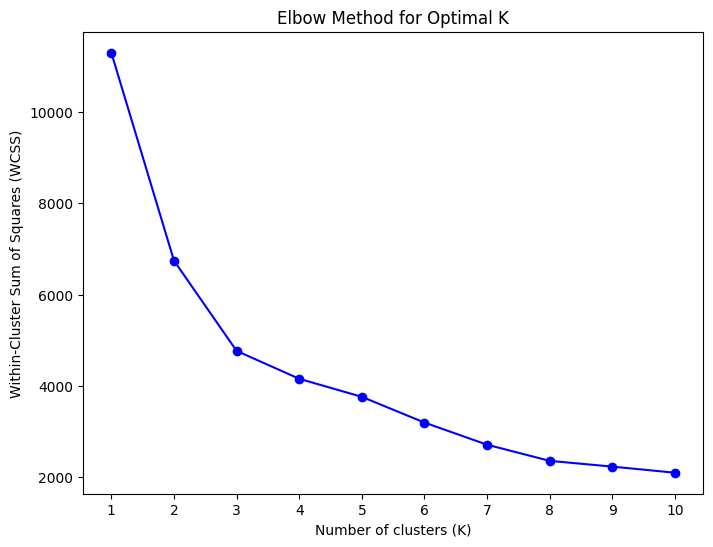

In [ ]:
# Step 7: Plot the WCSS to find the "elbow" point
plt.figure(figsize=(8,6))
plt.plot(K_range, WCSS, 'bo-', marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(K_range)
# Step 7: Plot the WCSS to find the "elbow" point plt.figure(figsize=(8,6)) plt.plot(K_range, WCSS, 'bo-', marker='o') plt.title('Elbow Method for Optimal K') plt.xlabel('Number of clusters (K)') plt.ylabel('Within-Cluster Sum of Squares (WCSS)') plt.xticks(K_range) plt.grid(True) plt.show()plt.grid(True) plt.show()

In [ ]:
# Step 8: Train the final K-Means model with the optimal K (based on the elbow method)
optimal_k = 3  # Replace with the K determined by the elbow method
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_final.fit(X_scaled)

KMeans(n_clusters=3, random_state=42)

In [ ]:
# Step 9: Assign cluster labels and analyze the results
data['Cluster'] = kmeans_final.labels_

In [ ]:
# List of columns used for clustering along with the new 'Cluster' column
columns_to_display = ['QUANTITYORDERED', 'PRICEEACH', 'SALES', 'MSRP', 'Cluster']

In [ ]:
# Display only these columns from the DataFrame
print(data[columns_to_display].head(30))

    QUANTITYORDERED  PRICEEACH    SALES  MSRP  Cluster
0                30      95.70  2871.00    95        0
1                34      81.35  2765.90    95        0
2                41      94.74  3884.34    95        2
3                45      83.26  3746.70    95        2
4                49     100.00  5205.27    95        2
5                36      96.66  3479.76    95        0
6                29      86.13  2497.77    95        0
7                48     100.00  5512.32    95        2
8                22      98.57  2168.54    95        0
9                41     100.00  4708.44    95        2
10               37     100.00  3965.66    95        0
11               23     100.00  2333.12    95        0
12               28     100.00  3188.64    95        0
13               34     100.00  3676.76    95        0
14               45      92.83  4177.35    95        2
15               36     100.00  4099.68    95        0
16               23     100.00  2597.39    95        0
17        

In [ ]:
print(data['Cluster'].value_counts())

Cluster
0    997
1    975
2    851
Name: count, dtype: int64
